In [134]:
import pandas as pd
import os

#load your classifier. In this code, I have used KNN. You can choose other algorithms. You have to use at least 3 to complete this.
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler #module for perform scaling
from sklearn.model_selection import train_test_split #module for splitting datatset
from sklearn import metrics #module for evaluating performance

#visualization
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np

In [135]:
#load your data
# df = pd.read_csv("data_attack.csv")
df = pd.read_csv("data_attack_noisy_1.csv") #added random number (-.5 to .5) to every number to simulate increased resolution of sensor
df.head() # prints top 5 rows from the datatset to check data is load or no

,Temp,Humd,Label
0,75.462882,114.512360,0
1,22.613086,42.777613,1
2,23.192433,42.864486,1
3,22.615530,42.789465,1
4,23.031446,43.132599,1


In [136]:
#  Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)
print(f'{df.size/3= }')
df = df.drop_duplicates()
print(f'after dropping: {df.size/3= }')
x = df.drop(['Label'],axis=1) #remove class or label
y = df['Label'] #load label

Missing Values:
 Temp     0
Humd     0
Label    0
dtype: int64
df.size/3= 1001.0
after dropping: df.size/3= 1001.0


In [137]:
#split datatset. Here ratio is 80:20. Change accordingly
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2, random_state=111111) 
# Scale the data using standardization
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) #scale training set
x_test = scaler.transform(x_test) #scale test set
x_train_original = scaler.inverse_transform(x_train)
x_test_original = scaler.inverse_transform(x_test)

# KNN

In [138]:
model_type = "KNN"
z = KNeighborsClassifier(n_neighbors=3) # KNN classifier for 3 neighbours
MODEL = z.fit(x_train,y_train) # start training
predict = MODEL.predict(x_test) # performance in the test set
print("Accuracy:", metrics.accuracy_score(y_test,predict)) # evaluating the performance based on accuracy

Accuracy: 0.9900497512437811


Confusion Matrix:
 [[ 40   2]
 [  0 159]]


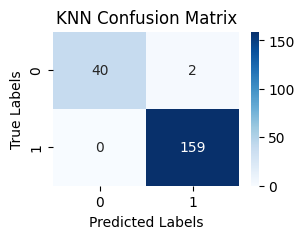

In [139]:
conf_matrix = metrics.confusion_matrix(y_test, predict)
print("Confusion Matrix:\n", conf_matrix)
# Plot the confusion matrix
plt.figure(figsize=(3, 2))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=True, yticklabels=True)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title(f"{model_type} Confusion Matrix")
plt.show()

c:\Users\levis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


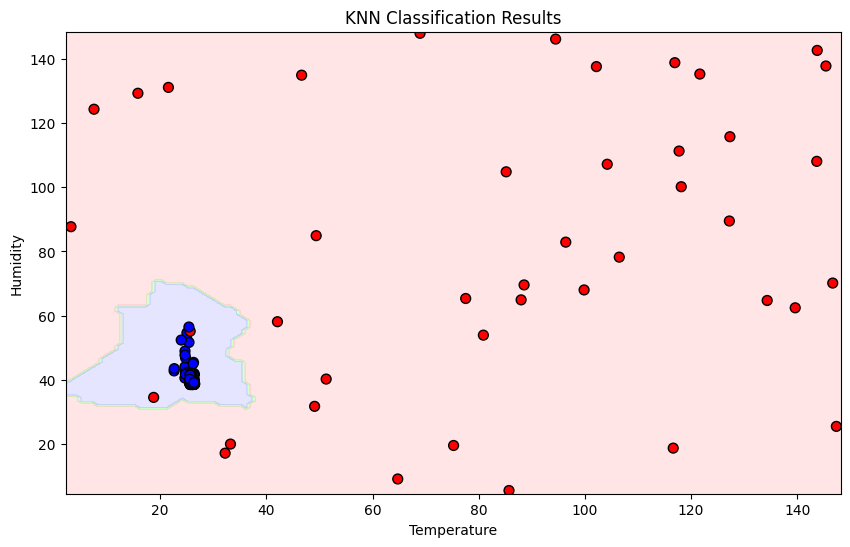

In [140]:
x_min, x_max = x_test_original[:, 0].min() - 1, x_test_original[:, 0].max() + 1
y_min, y_max = x_test_original[:, 1].min() - 1, x_test_original[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1),
                     np.arange(y_min, y_max,1))

# 2. Scale the mesh grid points to match the model's scale
mesh_points =  np.c_[xx.ravel(), yy.ravel()]
mesh_points_scaled =scaler.transform(np.c_[xx.ravel(), yy.ravel()])

# 3. Predict on the scaled mesh grid
Z = MODEL.predict(mesh_points_scaled)
Z = Z.reshape(xx.shape)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
# 4. Plot using original (un-scaled) test data
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.3)
plt.scatter(x_test_original[:, 0], x_test_original[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=50)
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title(f'{model_type} Classification Results')

plt.show()

# Naive Bayes

In [141]:
model_type = "Naive Bayes" # heading for charts
z = GaussianNB(var_smoothing=1e-4)# KNN classifier for 3 neighbours
MODEL = z.fit(x_train,y_train) # start training
predict = MODEL.predict(x_test) # performance in the test set
print("Accuracy:", metrics.accuracy_score(y_test,predict)) # evaluating the performance based on accuracy

Accuracy: 0.9751243781094527


Confusion Matrix:
 [[ 42   0]
 [  5 154]]


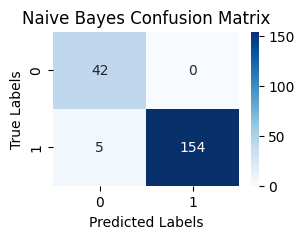

In [142]:
conf_matrix = metrics.confusion_matrix(y_test, predict)
print("Confusion Matrix:\n", conf_matrix)
# Plot the confusion matrix
plt.figure(figsize=(3, 2))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=True, yticklabels=True)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title(f"{model_type} Confusion Matrix")
plt.show()

c:\Users\levis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


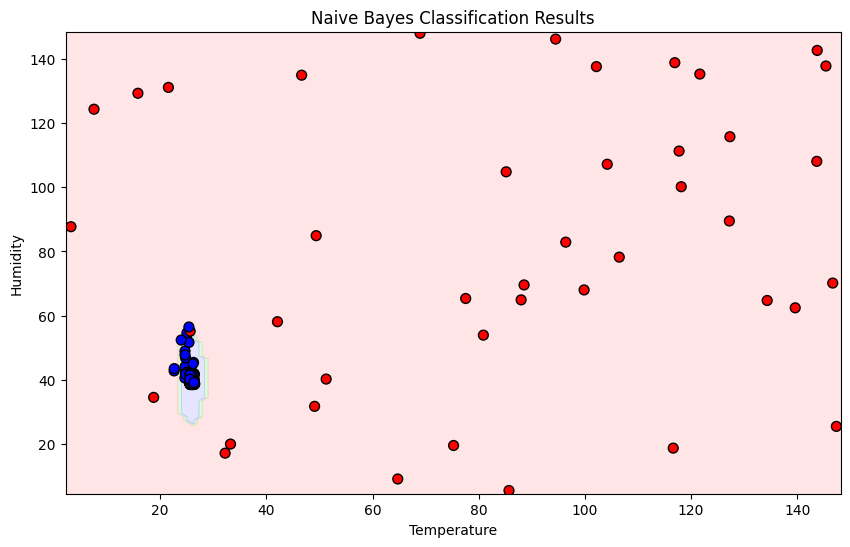

In [143]:
x_min, x_max = x_test_original[:, 0].min() - 1, x_test_original[:, 0].max() + 1
y_min, y_max = x_test_original[:, 1].min() - 1, x_test_original[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1),
                     np.arange(y_min, y_max,1))

# 2. Scale the mesh grid points to match the model's scale
mesh_points =  np.c_[xx.ravel(), yy.ravel()]
mesh_points_scaled =scaler.transform(np.c_[xx.ravel(), yy.ravel()])

# 3. Predict on the scaled mesh grid
Z = MODEL.predict(mesh_points_scaled)
Z = Z.reshape(xx.shape)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
# 4. Plot using original (un-scaled) test data
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.3)
plt.scatter(x_test_original[:, 0], x_test_original[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=50)
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title(f'{model_type} Classification Results')

plt.show()

# Decision Tree

In [144]:
model_type = "Decicion Tree" # heading for charts
z = DecisionTreeClassifier()
MODEL = z.fit(x_train,y_train) # start training
predict = MODEL.predict(x_test) # performance in the test set
print("Accuracy:", metrics.accuracy_score(y_test,predict)) # evaluating the performance based on accuracy

Accuracy: 0.9950248756218906


Confusion Matrix:
 [[ 41   1]
 [  0 159]]


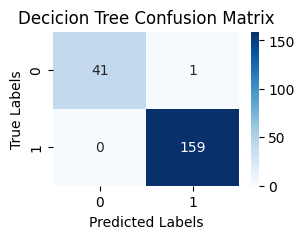

In [145]:
conf_matrix = metrics.confusion_matrix(y_test, predict)
print("Confusion Matrix:\n", conf_matrix)
# Plot the confusion matrix
plt.figure(figsize=(3, 2))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=True, yticklabels=True)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title(f"{model_type} Confusion Matrix")
plt.show()

c:\Users\levis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


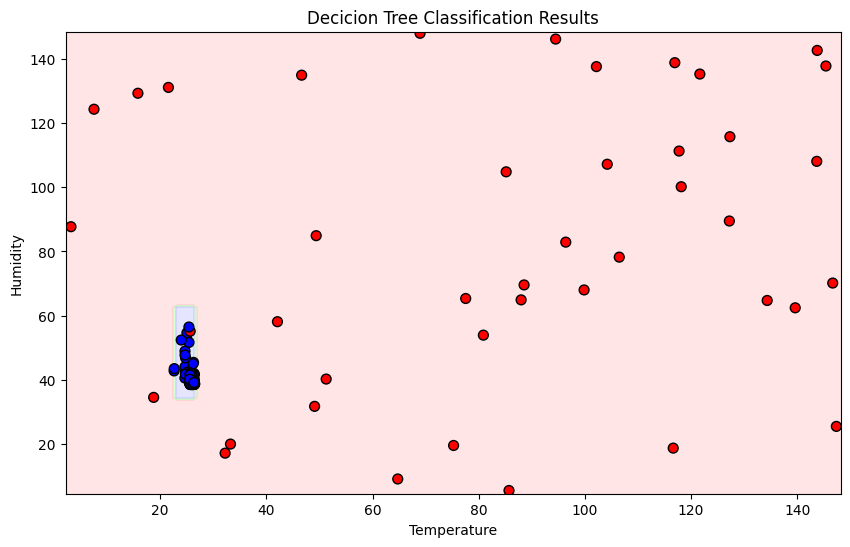

In [146]:
x_min, x_max = x_test_original[:, 0].min() - 1, x_test_original[:, 0].max() + 1
y_min, y_max = x_test_original[:, 1].min() - 1, x_test_original[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1),
                     np.arange(y_min, y_max,1))

# 2. Scale the mesh grid points to match the model's scale
mesh_points =  np.c_[xx.ravel(), yy.ravel()]
mesh_points_scaled =scaler.transform(np.c_[xx.ravel(), yy.ravel()])

# 3. Predict on the scaled mesh grid
Z = MODEL.predict(mesh_points_scaled)
Z = Z.reshape(xx.shape)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
# 4. Plot using original (un-scaled) test data
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.3)
plt.scatter(x_test_original[:, 0], x_test_original[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=50)
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title(f'{model_type} Classification Results')

plt.show()

In [147]:
# library for save and load scikit-learn models
print(f'{model_type = }')
import pickle
# file name, recommending *.pickle as a file extension
filename = f"{model_type}_model.pickle"
# save model
pickle.dump(z, open(filename, "wb"))

model_type = 'Decicion Tree'
